### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий

### ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3


#### Дисциплина: Методы машинного обучения

##### Студент: Мухамедияр Адиль
##### Группа: НКНбд-01-20

## Москва 2023
***

# Постановка задачи:

1.    Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции.

2.    Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.

3.    Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок.

4.    Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции.

5.    Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок.

6.    Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок.

7.    Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость итерационной процедуры.

8.    Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля tf.math. 

9.    Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.

# Вариант №28



### Дополнение к основной задаче:

1. Функция одной переменной f(x)=sqrt(1-e^(-2*x)) на отрезке [1,5]
2. Порядок производной функции одной переменной 4.
3. Функция двух перменных f(x,y)=e^(-x)*sin(y) в области [0,2] x [0,3]
4. Порядок смешанной производной функции двух переменных d2/dx2dy
5. Показатель качества регрессии: максимальная ошибка(MaxErr)

## Решение:

### Пункт 1

In [112]:
# Добавляем библиотеки, которыми мы воспользуемся в дальнейшем:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math

In [113]:
def fun1(x):
    return tf.math.sqrt(1 - tf.exp(-2 * x))
segment1 = tf.Variable(np.linspace(1, 5, 50))
tensor1 = fun1(segment1)
max_value = tf.reduce_max(tensor1)
min_value = tf.reduce_min(tensor1)
print("Максимальное значение функции: ", max_value.numpy())
print("\nМинимальное значение функции: ", min_value.numpy())

Максимальное значение функции:  0.9999772997774687

Минимальное значение функции:  0.9298734950321937


### Пункт 2

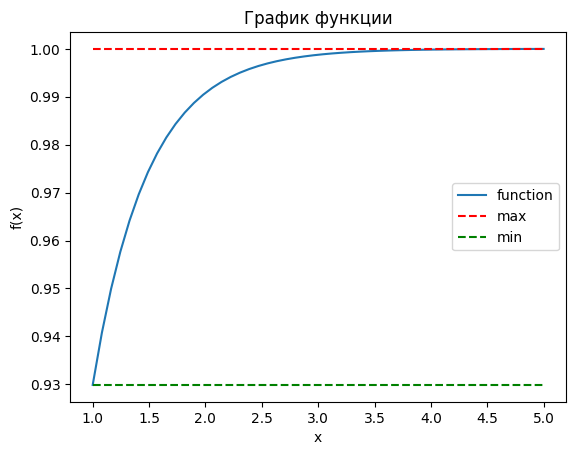

In [114]:
fig, ax = plt.subplots()
ax.plot(segment1, fun1(segment1), label='function')

# Прямые, соответствующие максимальному и минимальному значению функции
ax.plot([1, 5], [max_value, max_value], 'r--', label='max')
ax.plot([1, 5], [min_value, min_value], 'g--', label='min')

# Подписываем оси, заголовок и легенду
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('График функции')
ax.legend()
plt.show()

### Пункт 3

In [115]:
def f_4(x):
    with tf.GradientTape() as s1:
        with tf.GradientTape() as s2:
            with tf.GradientTape() as s3:
                with tf.GradientTape() as s4:
                    y = fun1(x)
                dy_dx = s4.gradient(y, x)
            d2y_dx2 = s3.gradient(dy_dx, x)
        d3y_dx3 = s2.gradient(d2y_dx2, x)
    d4y_dx4 = s1.gradient(d3y_dx3, x)
    return d4y_dx4

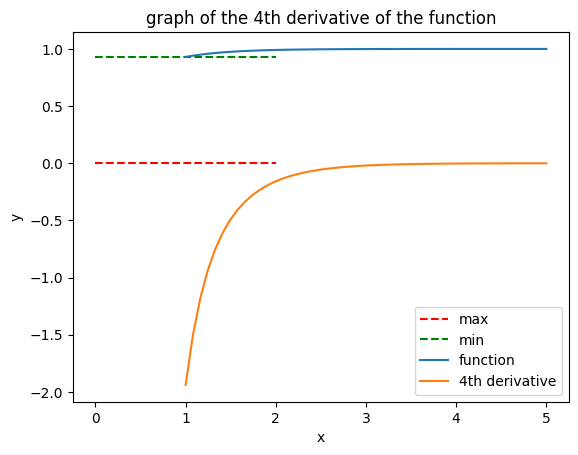

In [116]:
fig, ax = plt.subplots()
y_4 = f_4(segment1)
max_value=tf.reduce_max(y_4)
ax.plot([0, 2], [max_value, max_value], 'r--', label='max')
ax.plot([0, 2], [min_value, min_value], 'g--', label='min')
ax.plot(segment1, fun1(segment1), label="function")
ax.plot(segment1, y_4.numpy(), label="4th derivative")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("graph of the 4th derivative of the function")
ax.legend()
plt.show()

### Пункт 4


In [117]:
def f(x, y):
    return tf.exp(-x) * tf.math.sin(y)

x_2 = tf.Variable(np.linspace(0, 2, 50))
y_2 = tf.Variable(np.linspace(0, 3, 50))

#мы используем функцию tf.meshgrid, чтобы создать сетку X и Y, которая представляет собой матрицы, содержащие значения x и y в каждой точке 
X, Y = tf.meshgrid(x_2, y_2)
Z = f(X,Y)
print("Матрица:\n", Z.numpy(), "\n")
print("Максимальное значение функции:", tf.reduce_max(Z).numpy())
print("\nМинимальное значение функции:", tf.reduce_min(Z).numpy())

Матрица:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.06118625 0.05873913 0.05638989 ... 0.00898499 0.00862564 0.00828066]
 [0.12214321 0.11725815 0.11256846 ... 0.01793631 0.01721895 0.01653029]
 ...
 [0.26098424 0.25054629 0.2405258  ... 0.03832463 0.03679185 0.03532038]
 [0.20142953 0.19337344 0.18563956 ... 0.02957922 0.02839622 0.02726052]
 [0.14112001 0.13547598 0.13005767 ... 0.02072298 0.01989418 0.01909852]] 

Максимальное значение функции: 0.9997786587835266

Минимальное значение функции: 0.0


### Пункт 5


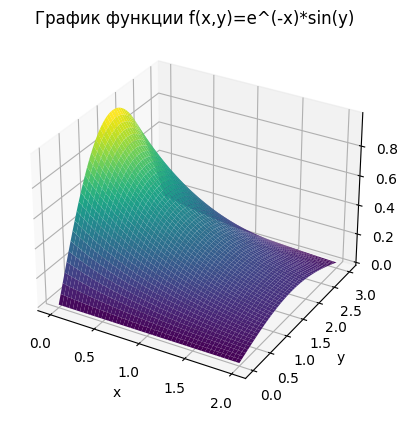

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('График функции f(x,y)=e^(-x)*sin(y)')
plt.show()

### Пункт 6


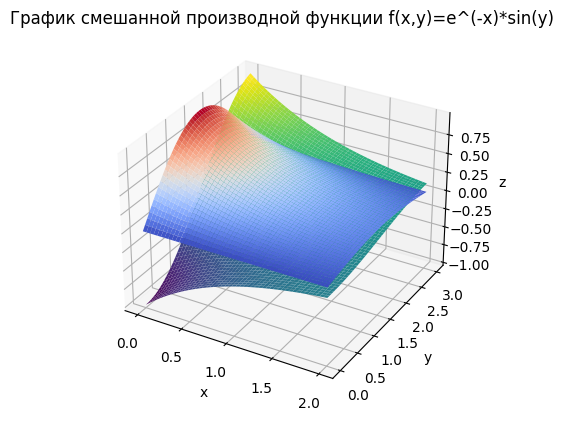

In [119]:
# Производная 4-го порядка:
def f_mixed(x, y):
    with tf.GradientTape() as t4:
        t4.watch(y)
        with tf.GradientTape() as t3:
            t3.watch(x)
            with tf.GradientTape() as t2:
                t2.watch(x)
                with tf.GradientTape() as t1:
                    t1.watch(x)
                    t = tf.exp(-x) * tf.math.sin(y)
                g = t1.gradient(t, x)
            h = t2.gradient(g, x)
        k = t3.gradient(h, x)
    l = t4.gradient(k, y)
    return l

Z_mixed = f_mixed(X,Y)

# Графический вывод функции 4-го порядка
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z.numpy(), cmap='coolwarm')
ax.plot_surface(X, Y, Z_mixed.numpy(), cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('График смешанной производной функции f(x,y)=e^(-x)*sin(y)')
plt.show()

### Пункт 7

In [120]:
x_train = tf.constant(np.linspace(0, 2, 100), dtype=tf.float32)
y_train = tf.constant(tf.math.sqrt(1 - tf.exp(-2 * x_train)), dtype=tf.float32)

def loss(y_true, y_pred):
    return tf.reduce_max(tf.abs(y_true - y_pred))


class Model(object):
  def __init__(self):
    # Инициализируем вес как `2.0` и смещение как  `1.0`
    # На практике инициализация должна быть случайными значениями (`tf.random.normal`)
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

model = Model()

# Запоминаем историю значений 'w' и 'b' для визуализации
list_w, list_b = [], []
epochs = range(9)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, x_train, y_train, learning_rate=0.1)
  losses.append(current_loss)
  print('Эпоха %2d: w=%1.2f b=%1.2f, потери=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Эпоха  0: w=2.00 b=1.00, потери=4.00920
Эпоха  1: w=1.80 b=0.90, потери=3.50920
Эпоха  2: w=1.60 b=0.80, потери=3.00920
Эпоха  3: w=1.40 b=0.70, потери=2.50920
Эпоха  4: w=1.20 b=0.60, потери=2.00920
Эпоха  5: w=1.00 b=0.50, потери=1.50920
Эпоха  6: w=0.80 b=0.40, потери=1.00920
Эпоха  7: w=0.60 b=0.30, потери=0.50920
Эпоха  8: w=0.40 b=0.20, потери=0.39677


### Пункт 8

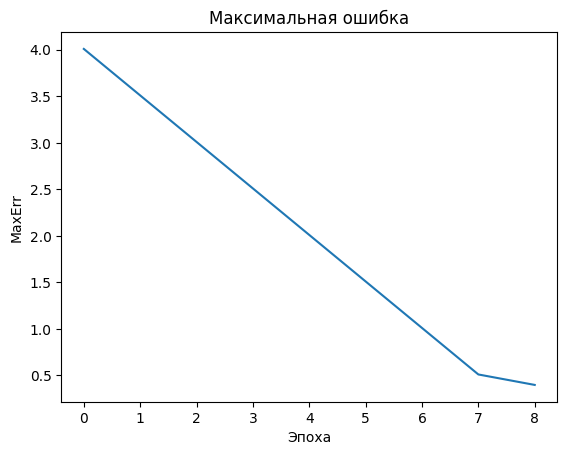

In [121]:
plt.plot(losses)
plt.title('Максимальная ошибка')
plt.xlabel('Эпоха')
plt.ylabel('MaxErr')
plt.show()

### Пункт 9

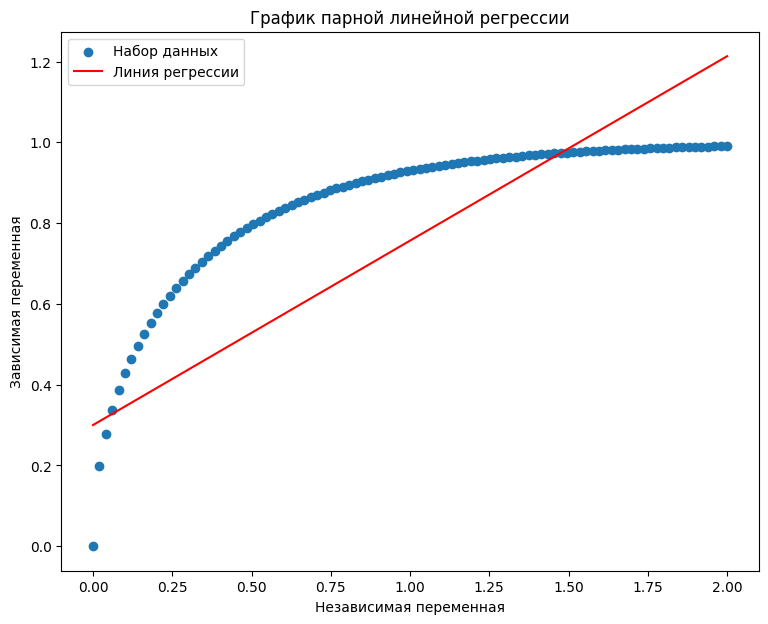

In [122]:
y_pred = model(x_train)
plt.figure(figsize=(9, 7))
plt.scatter(x_train, y_train, label='Набор данных')
plt.plot(x_train, y_pred, label='Линия регрессии', color='r')
plt.xlabel('Независимая переменная')
plt.ylabel('Зависимая переменная')
plt.title('График парной линейной регрессии')
plt.legend()
plt.show()